In [98]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
# Reading the dataset
df = pd.read_csv("LSTM-Multivariate_pollution.csv")

In [100]:
# Checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [101]:
# Summary Statistics
print(df.describe())

          pollution           dew          temp         press       wnd_spd  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

               snow          rain  
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


In [102]:
# Checking for missing values
df.isnull().sum()

,0
date,0
pollution,0
dew,0
temp,0
press,0
wnd_dir,0
wnd_spd,0
snow,0
rain,0


In [103]:
# Parsing date column and setting it as datetime index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [104]:
# Renaming columns for clarity
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [105]:
# Encoding wind direction (categorical feature)
le = LabelEncoder()
df['wnd_dir'] = le.fit_transform(df['wnd_dir'])

In [106]:
# Creating time-based features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek
df['year'] = df.index.year

In [107]:
# Creating lag features to capture temporal dependencies
df['pollution_lag1'] = df['pollution'].shift(1)
df['temp_lag1'] = df['temp'].shift(1)

In [108]:
# Dropping rows with NaN due to lag features
df.dropna(inplace=True)

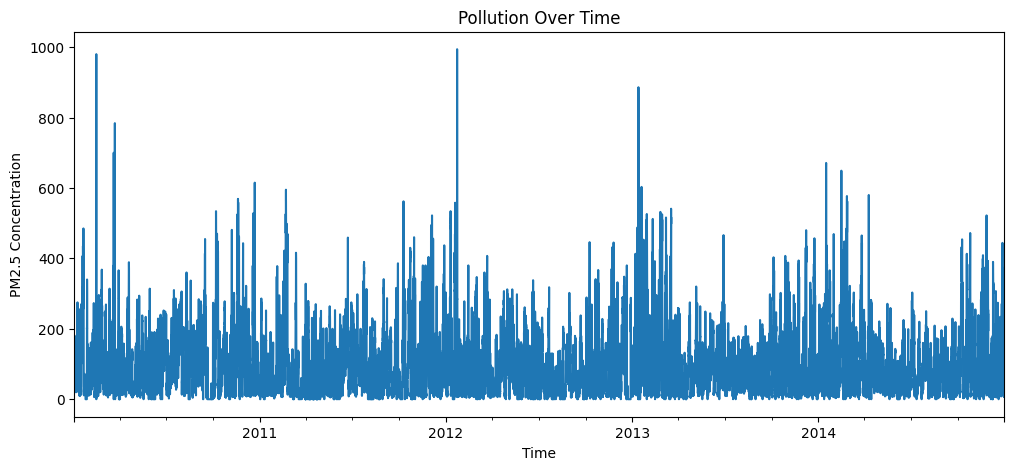

In [109]:
# Plotting pollution concentration over time
plt.figure(figsize=(12, 5))
df['pollution'].plot()
plt.title('Pollution Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.show()

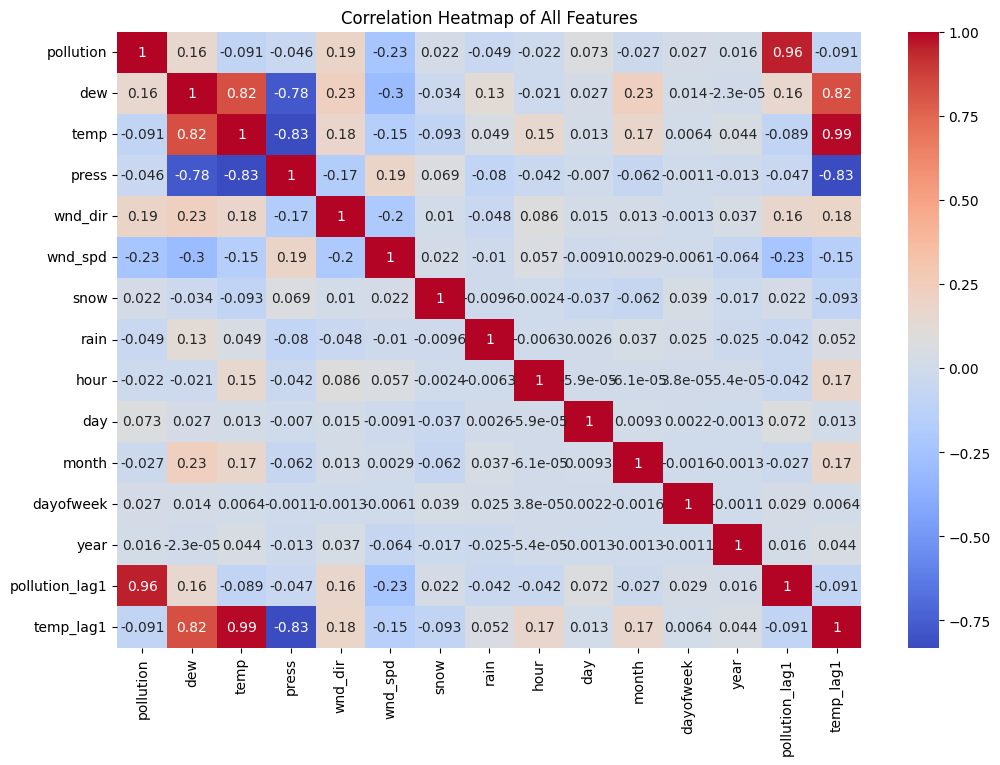

In [110]:
# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

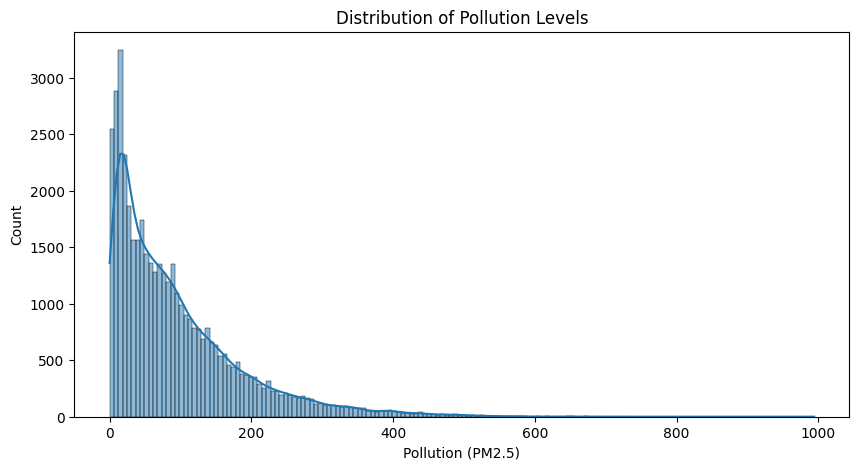

In [111]:
# Plotting distribution of pollution levels
plt.figure(figsize=(10, 5))
sns.histplot(df['pollution'], kde=True)
plt.title('Distribution of Pollution Levels')
plt.xlabel('Pollution (PM2.5)')
plt.show()

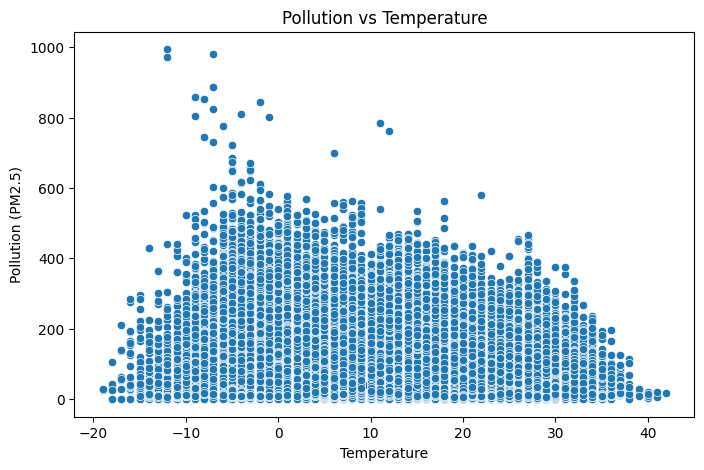

In [112]:
# Plotting pollution vs temperature scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='pollution', data=df)
plt.title('Pollution vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pollution (PM2.5)')
plt.show()

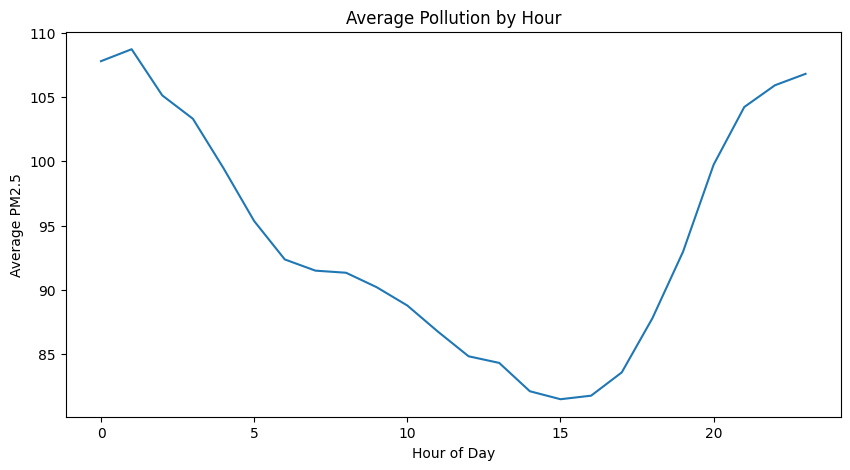

In [113]:
# Plotting average pollution by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='pollution', data=df.groupby('hour')['pollution'].mean().reset_index())
plt.title('Average Pollution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5')
plt.show()

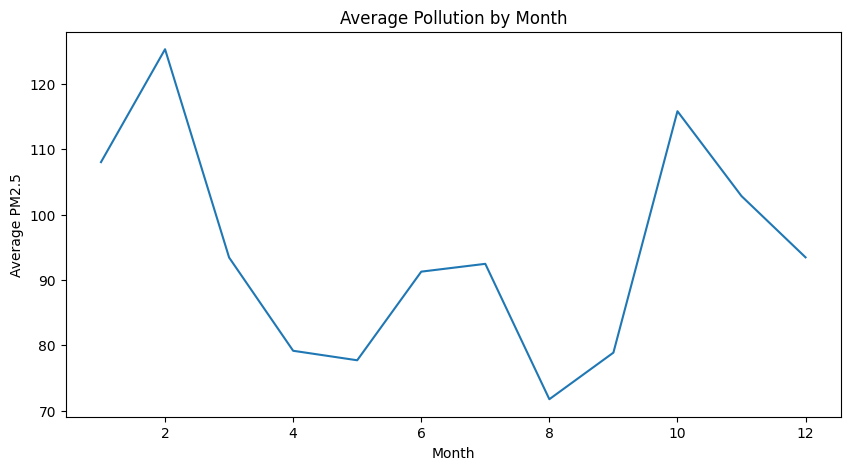

In [114]:
# Plotting average pollution by month
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='pollution', data=df.groupby('month')['pollution'].mean().reset_index())
plt.title('Average Pollution by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.show()

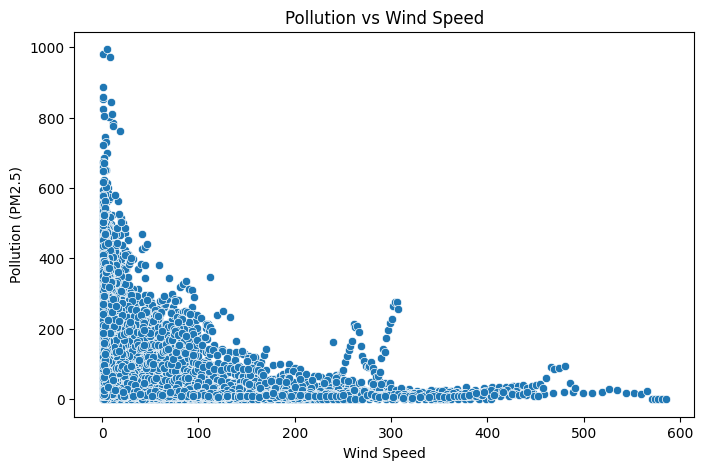

In [115]:
# Plotting wind speed vs pollution
plt.figure(figsize=(8, 5))
sns.scatterplot(x='wnd_spd', y='pollution', data=df)
plt.title('Pollution vs Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Pollution (PM2.5)')
plt.show()

In [116]:
# Defining features and target
features = ['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain',
            'hour', 'day', 'month', 'dayofweek', 'year',
            'pollution_lag1', 'temp_lag1']
target = 'pollution'

X = df[features]
y = df[target]

In [117]:
# Splitting data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, shuffle=False)

In [118]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Training a Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [120]:
# Training a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [121]:
# Predicting on validation and test sets
lr_preds = lr.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)

In [122]:
# Defining evaluation function
def evaluate_model(y_true, y_pred, name="Model"):
    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print("-" * 30)

# Evaluating both models
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest")

Linear Regression Performance:
MAE: 11.760966821754254
MSE: 486.43189035327674
RMSE: 22.055200981928884
R²: 0.9214952710894764
------------------------------
Random Forest Performance:
MAE: 12.985117199391173
MSE: 593.5649374733638
RMSE: 24.363188163156394
R²: 0.9042051817916456
------------------------------


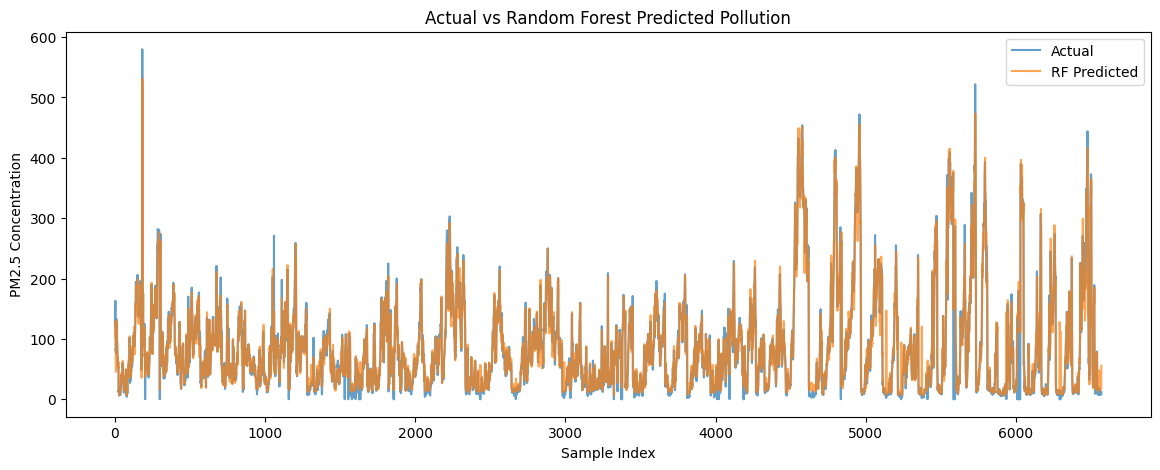

In [123]:
# Plotting actual vs predicted (Random Forest)
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(rf_preds, label='RF Predicted', alpha=0.7)
plt.title('Actual vs Random Forest Predicted Pollution')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

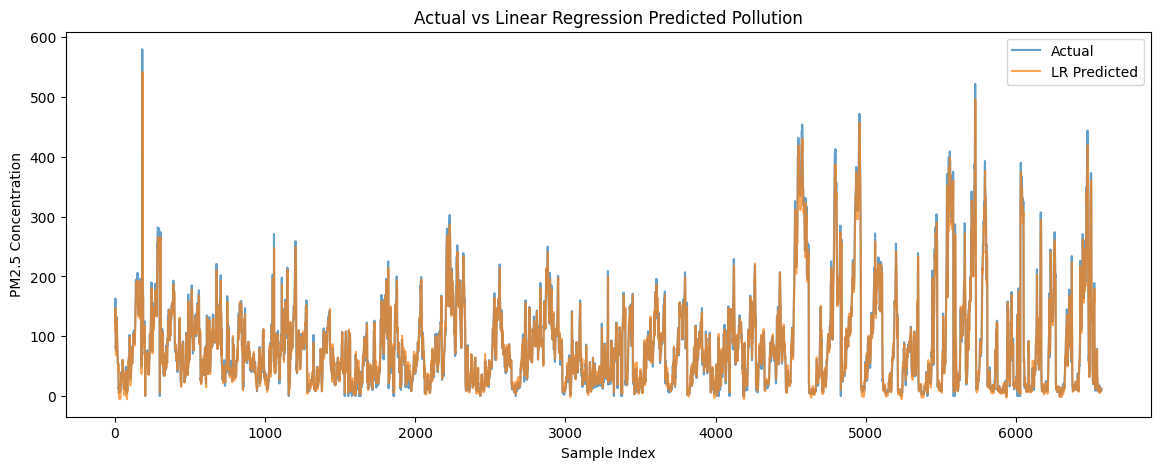

In [124]:
# Plotting actual vs predicted (Linear Regression)
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(lr_preds, label='LR Predicted', alpha=0.7)
plt.title('Actual vs Linear Regression Predicted Pollution')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

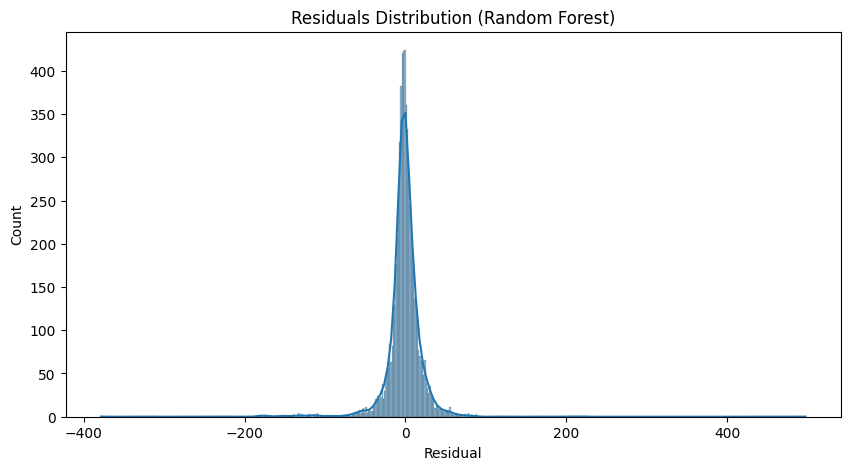

In [125]:
# Plotting residuals
plt.figure(figsize=(10, 5))
sns.histplot(y_test - rf_preds, kde=True)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residual')
plt.show()

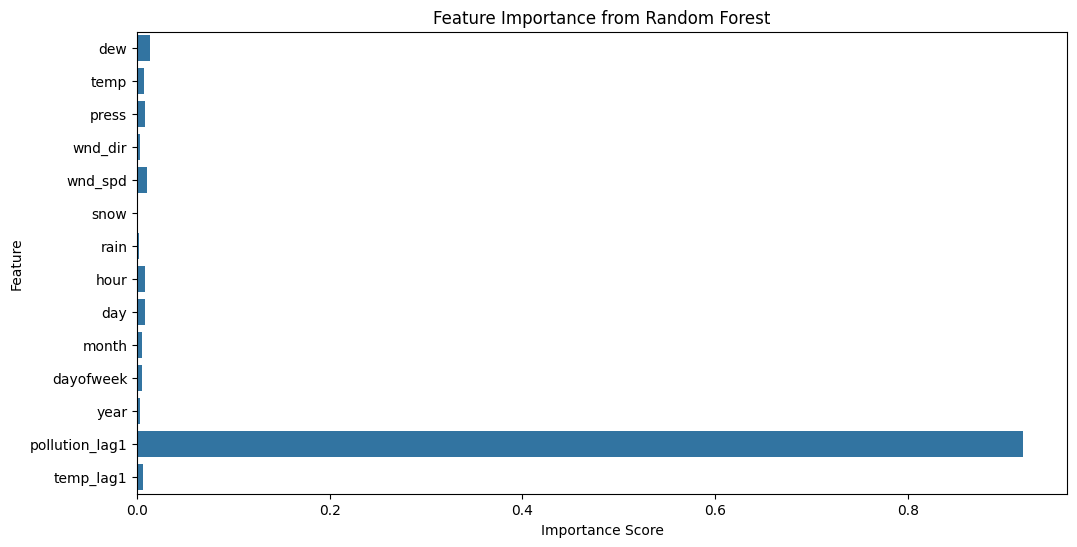

In [126]:
# Plotting feature importance from Random Forest
plt.figure(figsize=(12, 6))
importance = rf.feature_importances_
sns.barplot(x=importance, y=features)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()